<a href="https://colab.research.google.com/github/saravanan421/machine-learning/blob/main/EDA_banglore_houseprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import missingno as msno
warnings.filterwarnings('ignore')

In [ ]:
datas=pd.read_csv('Bengaluru_House_Data.csv')
datas.head()
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
datas.value_counts().head(100)

area_type             availability   location               size   society  total_sqft  bath  balcony  price 
Super built-up  Area  Ready To Move  Haralur Road           2 BHK  RInceeg  1243        2.0   2.0      46.00     10
                                     HSR Layout             2 BHK  NRosete  1140        2.0   2.0      46.00      9
                                     Parappana Agrahara     2 BHK  Peide L  1194        2.0   2.0      47.00      7
                      21-Dec         Kanakpura Road         3 BHK  PrarePa  1100        3.0   2.0      53.00      5
                      Ready To Move  Raja Rajeshwari Nagar  2 BHK  GrrvaGr  1196        2.0   2.0      40.54      5
                                                                                                                 ..
                                     Harlur                 2 BHK  Prncyrn  1174        2.0   1.0      78.00      2
                                                                                                       75.00      2
                                     Whitefield             2 BHK  SSthamh  1205        2.0   1.0      40.00      2
                                                                            1180        2.0   2.0      41.00      2
                                     Marathahalli           3 BHK  Asintas  1710        3.0   2.0      100.00     2
Name: count, Length: 100, dtype: int64

<Axes: >

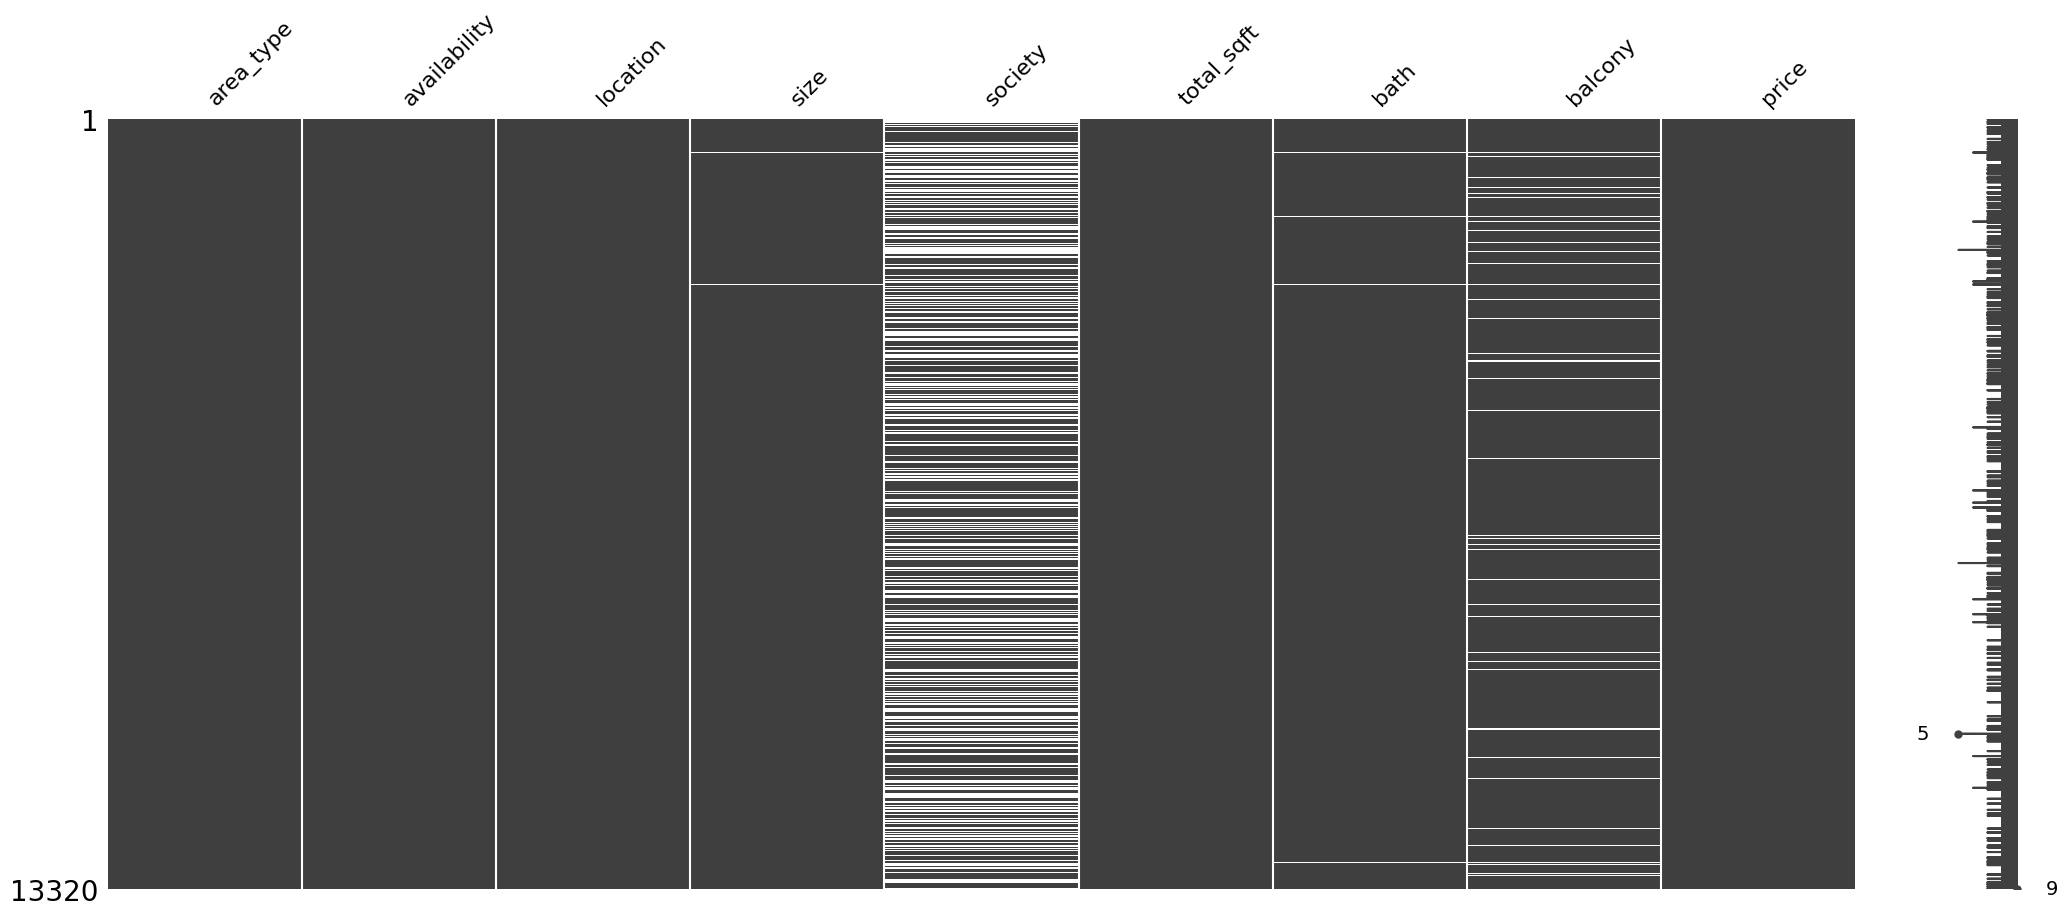

In [ ]:
datas.isnull().sum()
msno.matrix(datas)

In [ ]:
'''society is droped because of missing values'''
datas=datas.drop(['society'],axis=1)
datas.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


<Axes: >

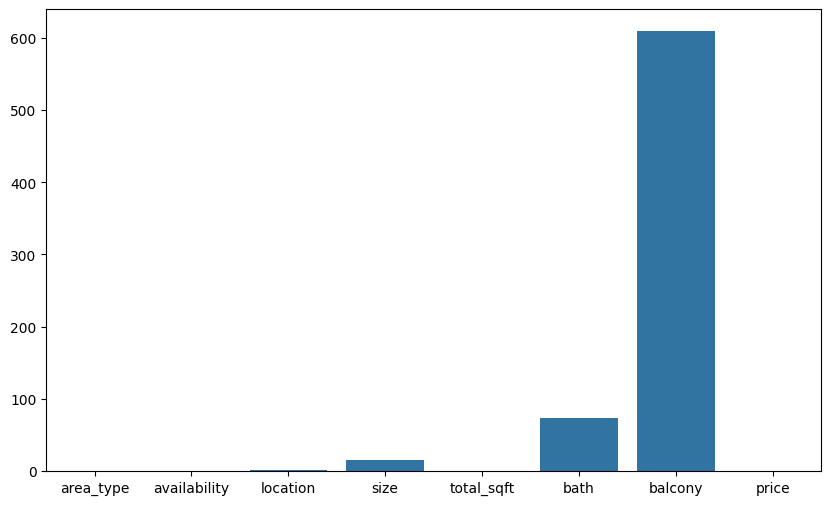

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(datas.isnull().sum())

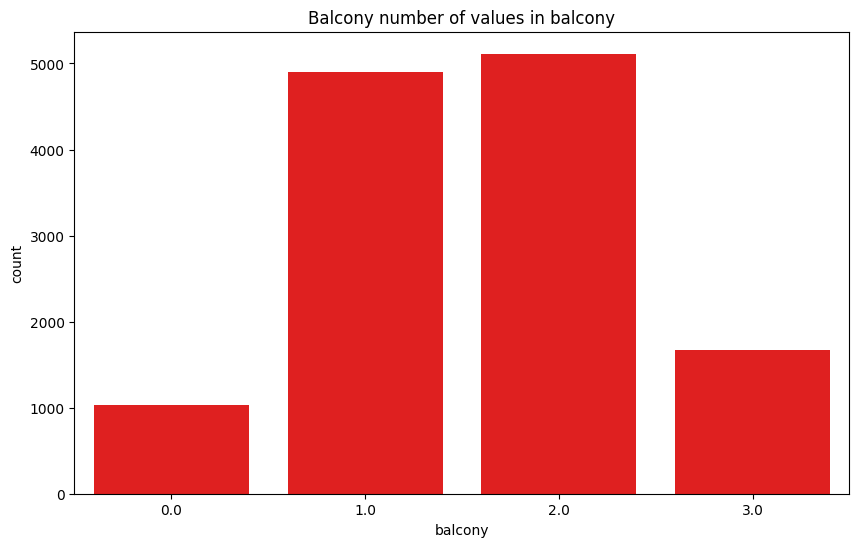

In [ ]:
y=datas.balcony.value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(y,color='red')
plt.title('Balcony number of values in balcony')
plt.show()


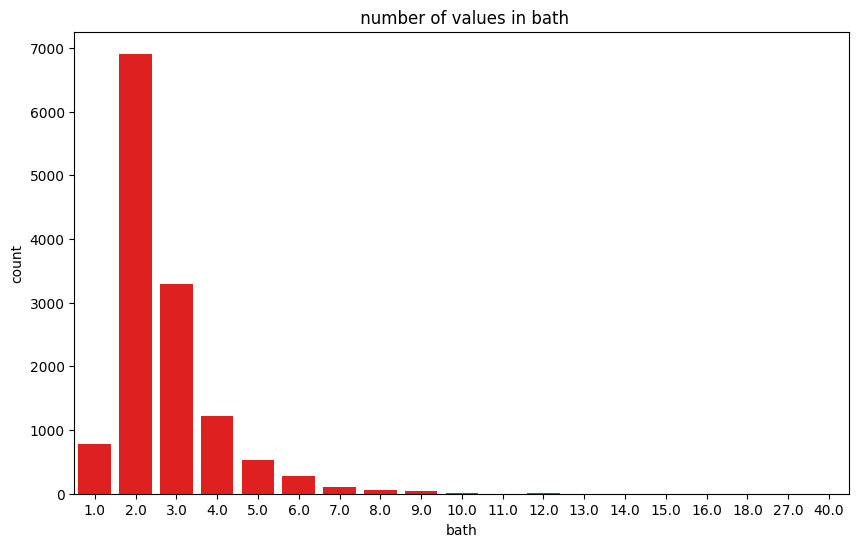

In [ ]:
y=datas.bath.value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(y,color='red')
plt.title(' number of values in bath')
plt.show()

<Axes: xlabel='area_type', ylabel='area_type'>

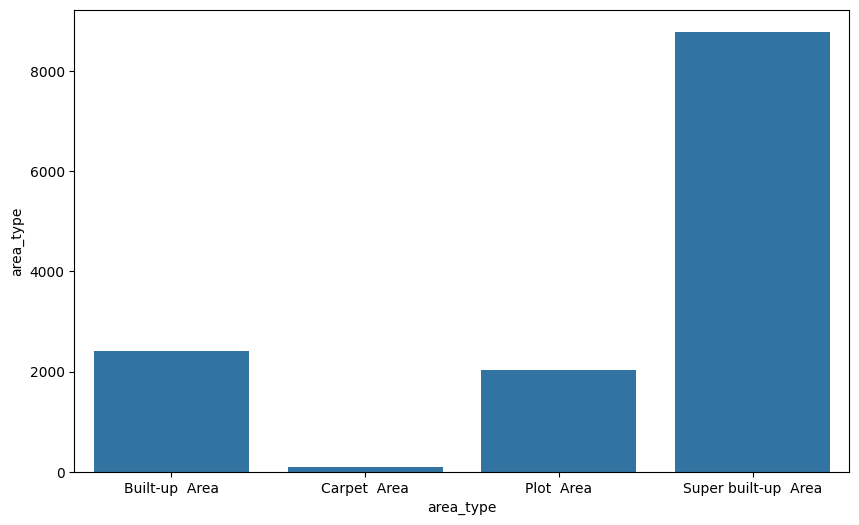

In [ ]:
data=datas.groupby('area_type')['area_type'].agg('count')
plt.figure(figsize=(10, 6))
sns.barplot(data)

In [ ]:
corr=datas['balcony'].corr(datas['bath'])
print(corr)

0.2042011111295137


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
datas['size']=le.fit_transform(datas['size'])
datas.head()
coss=datas['bath'].corr(datas['size'])
print(coss)
print(datas.bath.isna().sum())

0.6780296315356981
73


In [ ]:
datas.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [ ]:
datas.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [ ]:
def convert_range_to_avg(x):
  if '-' in x:
    nums = x.split('-')
    return (float(nums[0]) + float(nums[1])) / 2
  try:
    return float(x)
  except:
    return None

datas['total_sqft'] = datas['total_sqft'].apply(convert_range_to_avg)
datas['total_sqft'] = datas['total_sqft'].astype('float64')

In [ ]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13320 non-null  int64  
 4   total_sqft    13274 non-null  float64
 5   bath          13247 non-null  float64
 6   balcony       12711 non-null  float64
 7   price         13320 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 832.6+ KB


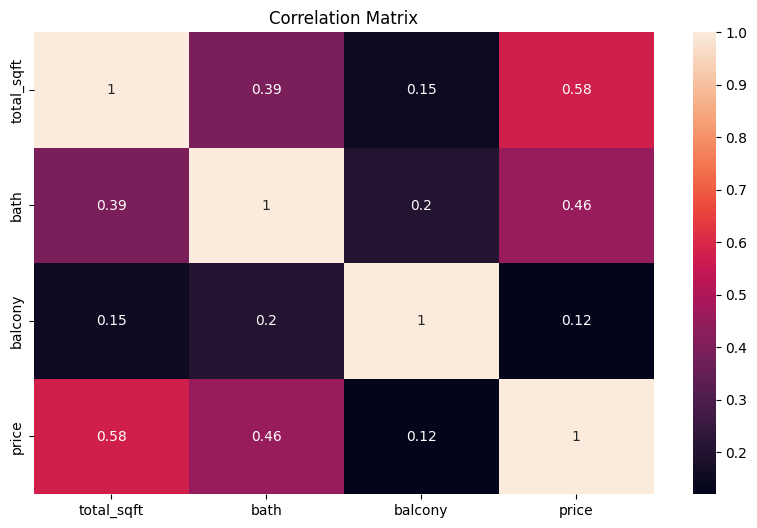

In [ ]:
#finding corroleation
plt.figure(figsize=(10, 6))
sns.heatmap(datas.iloc[:,4:].corr(),annot=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
datass = imputer.fit_transform(datas.iloc[:, 4:])
datass = pd.DataFrame(datass, columns=datas.columns[4:])
datas.iloc[:, 4:] = datass
datas.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,13,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,19,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,16,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,16,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,13,1200.0,2.0,1.0,51.00


<Axes: >

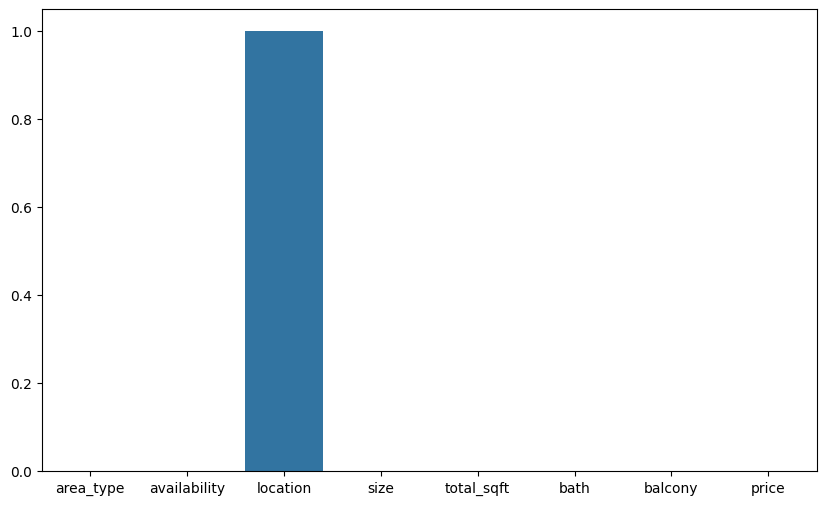

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(datas.isnull().sum())

In [ ]:
datas['bath']=datas['bath'].astype('int64')
datas['balcony']=datas['balcony'].astype('int64')

datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13320 non-null  int64  
 4   total_sqft    13320 non-null  float64
 5   bath          13320 non-null  int64  
 6   balcony       13320 non-null  int64  
 7   price         13320 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 832.6+ KB


In [ ]:
#finding duplicates
duplicated_datas=datas[datas.duplicated()]
duplicated_datas.shape

(570, 8)

In [ ]:
datas=datas.drop_duplicates()
datas[datas.duplicated()].shape
datas.shape

(12750, 8)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe791d94a90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe791d94fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe791d947f0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fe791d95510>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe791d957b0>,
 'means': []}

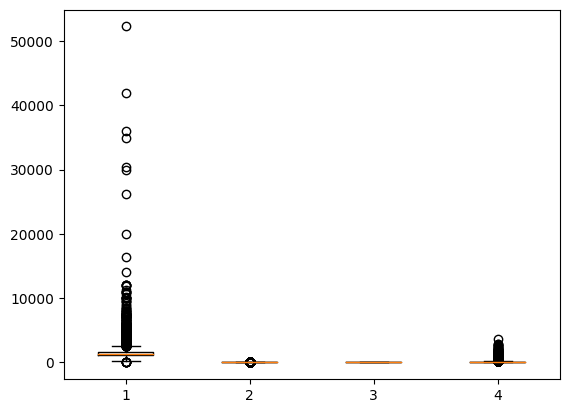

In [ ]:
plt.boxplot(datas.iloc[:,4:])

In [ ]:
Q1 = datas.iloc[:,4:].quantile(0.25)
Q3 = datas.iloc[:,4:].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)
datas_no_outliers = datas[~((datas.iloc[:,4:] < lower_bound) | (datas.iloc[:,4:] > upper_bound)).any(axis=1)]
datas_no_outliers.shape
datas_no_outliers.head()

total_sqft    210.5
bath            0.5
balcony        -0.5
price         -58.0
dtype: float64
total_sqft    2582.5
bath             4.5
balcony          3.5
price          230.0
dtype: float64


,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,13,1056.0,2,1,39.07
2,Built-up Area,Ready To Move,Uttarahalli,16,1440.0,2,3,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,16,1521.0,3,1,95.00
4,Super built-up Area,Ready To Move,Kothanur,13,1200.0,2,1,51.00
5,Super built-up Area,Ready To Move,Whitefield,13,1170.0,2,1,38.00


<Axes: ylabel='Count'>

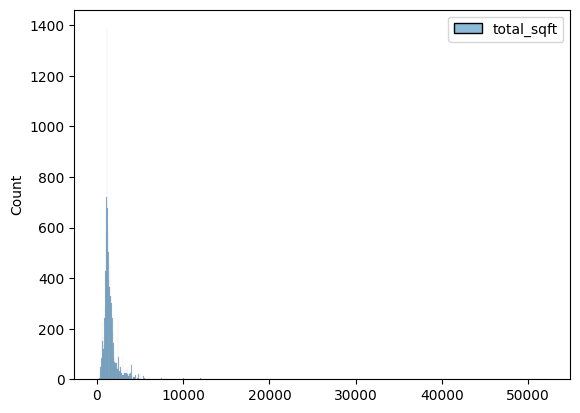

In [ ]:
sns.histplot(datas.iloc[:,4:5])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe7914a3f70>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe7916037c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe7914a3cd0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fe791603d30>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe791603fd0>,
 'means': []}

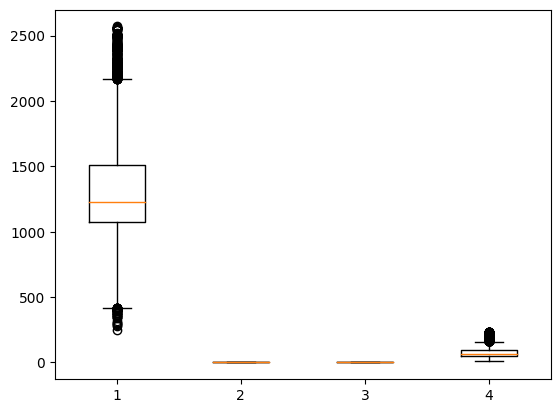

In [ ]:
plt.boxplot(datas_no_outliers.iloc[:,4:])

<Axes: ylabel='Count'>

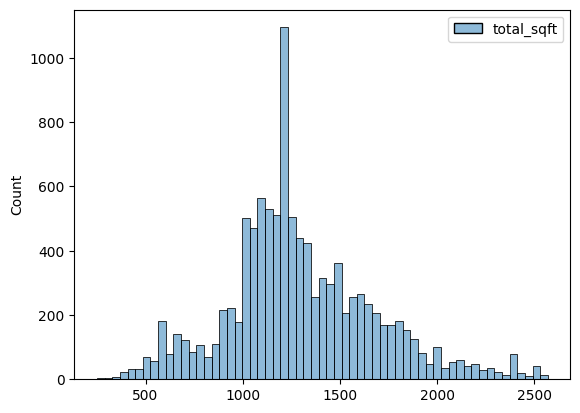

In [ ]:
sns.histplot(datas_no_outliers.iloc[:,4:5])

In [ ]:
#data transforming steps
datas_no_outliers.head(10)

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,13,1056.0,2,1,39.07
2,Built-up Area,Ready To Move,Uttarahalli,16,1440.0,2,3,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,16,1521.0,3,1,95.00
4,Super built-up Area,Ready To Move,Kothanur,13,1200.0,2,1,51.00
5,Super built-up Area,Ready To Move,Whitefield,13,1170.0,2,1,38.00
8,Super built-up Area,Ready To Move,Marathahalli,16,1310.0,3,1,63.25
10,Super built-up Area,18-Feb,Whitefield,16,1800.0,2,2,70.00
12,Super built-up Area,Ready To Move,7th Phase JP Nagar,13,1000.0,2,1,38.00
13,Built-up Area,Ready To Move,Gottigere,13,1100.0,2,2,40.00
14,Plot Area,Ready To Move,Sarjapur,17,2250.0,3,2,148.00


In [ ]:
#feature scaling process
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
datas_no_outliers[['total_sqft']]=scaler.fit_transform(datas_no_outliers[['total_sqft']])
datas_no_outliers.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,13,-0.398169,2,1,39.07
2,Built-up Area,Ready To Move,Uttarahalli,16,0.480549,2,3,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,16,0.665904,3,1,95.00
4,Super built-up Area,Ready To Move,Kothanur,13,-0.068650,2,1,51.00
5,Super built-up Area,Ready To Move,Whitefield,13,-0.137300,2,1,38.00


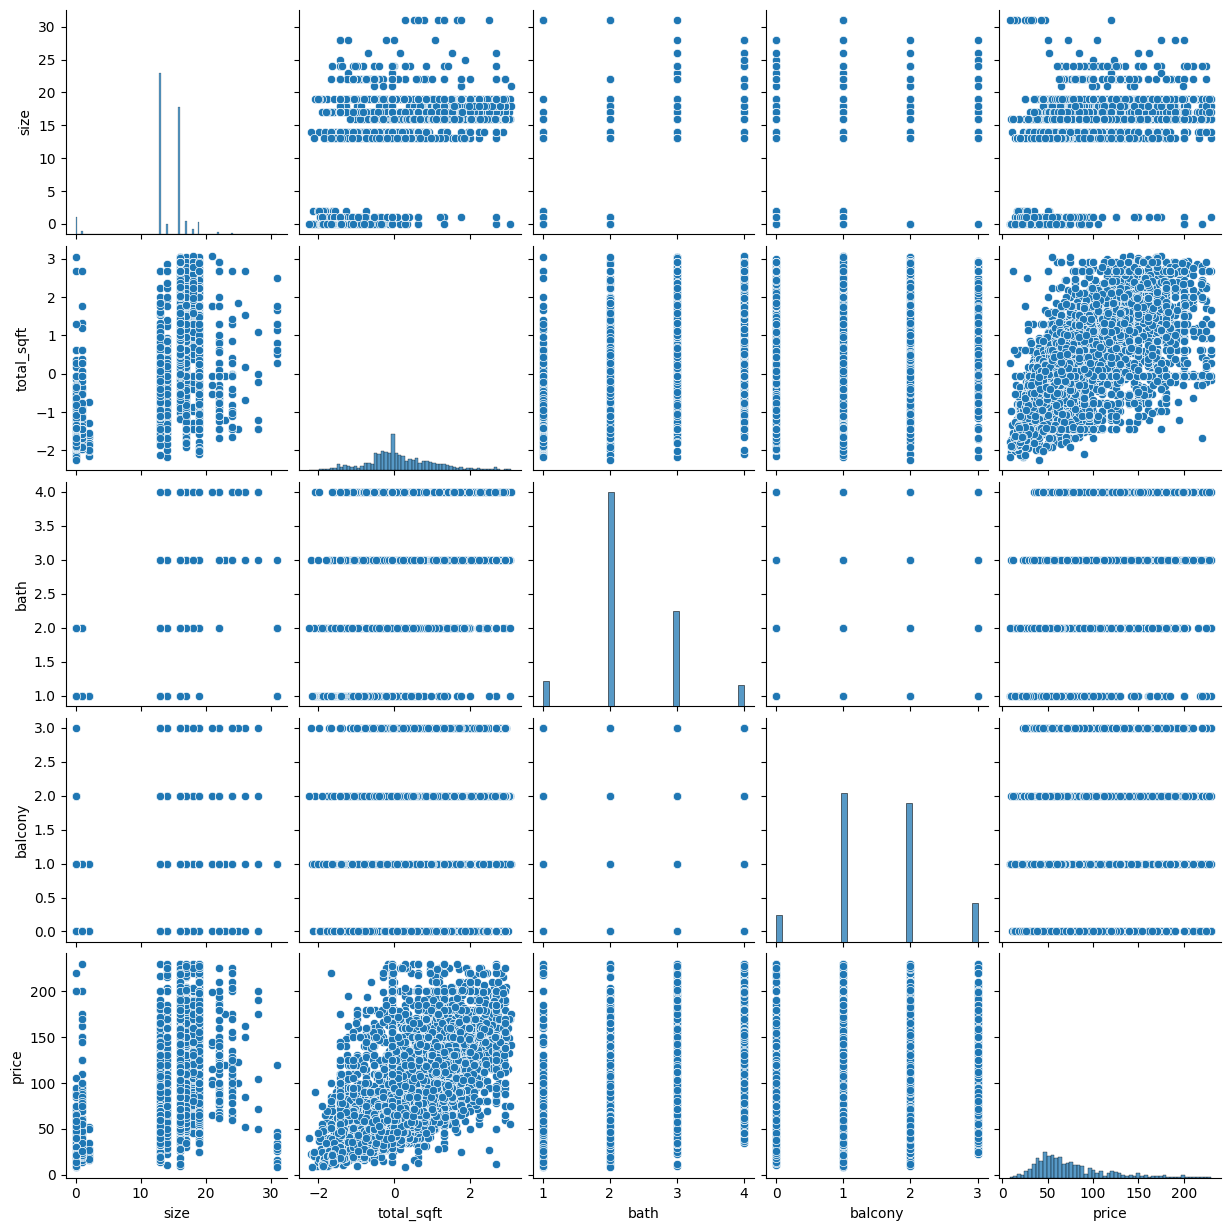

In [ ]:
sns.pairplot(datas_no_outliers)